In [1]:
%matplotlib widget
import numpy as np
import scipy as sp
import pandas as pd
import scipy.optimize
import pysces
from matplotlib import pyplot as plt
import os
import copy
from lmfit import Model
backupdir = os.getcwd()

Matplotlib backend set to: "module://ipympl.backend_nbagg"
Matplotlib interface loaded (pysces.plt.m)
Pitcon routines available
NLEQ2 routines available
SBML support available
You are using NumPy (1.26.4) with SciPy (1.12.0)
RateChar is available
Parallel scanner is available

PySCeS environment
******************
pysces.model_dir = /Users/courtneycampbell/Pysces/psc
pysces.output_dir = /Users/courtneycampbell/Pysces


***********************************************************************
* Welcome to PySCeS (1.2.0) - Python Simulator for Cellular Systems   *
*                http://pysces.sourceforge.net                        *
* Copyright(C) B.G. Olivier, J.M. Rohwer, J.-H.S. Hofmeyr, 2004-2024  *
* Triple-J Group for Molecular Cell Physiology                        *
* Stellenbosch University, ZA and VU University Amsterdam, NL         *
* PySCeS is distributed under the PySCeS (BSD style) licence, see     *
* LICENCE.txt (supplied with this release) for details                *
*

In [2]:
#Question 1

In [3]:
#read files
A0_5B24 = pd.read_csv('A0.5B24.csv', sep=',',names=['Time', 'NADPH'])
A1B24 = pd.read_csv('A1B24.csv', sep=',',names=['Time', 'NADPH'])
A2B24 = pd.read_csv('A2B24.csv', sep=',',names=['Time', 'NADPH'])
A4B24 = pd.read_csv('A4B24.csv', sep=',',names=['Time', 'NADPH'])
A8B24 = pd.read_csv('A8B24.csv', sep=',',names=['Time', 'NADPH'])

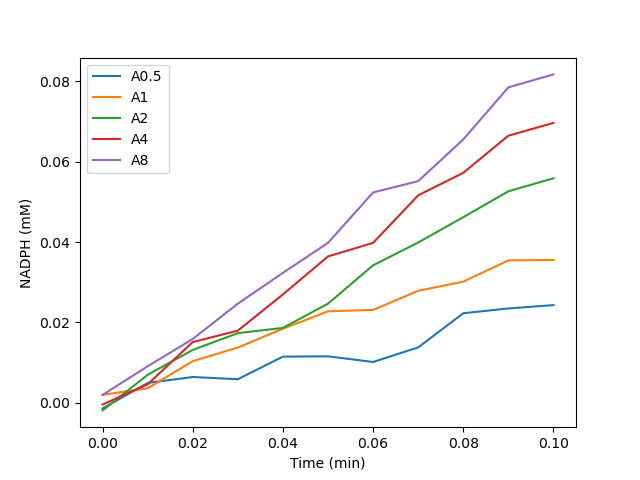

In [4]:
#plot 
f,ax = plt.subplots()
ax.plot (A0_5B24.Time, A0_5B24.NADPH, label='A0.5')
ax.plot (A1B24.Time, A1B24.NADPH, label='A1')
ax.plot (A2B24.Time, A2B24.NADPH, label='A2')
ax.plot (A4B24.Time, A4B24.NADPH, label='A4')
ax.plot (A8B24.Time, A8B24.NADPH, label='A8')
ax.set_xlabel('Time (min)')
ax.set_ylabel('NADPH (mM)')
ax.legend(loc='best')

In [5]:
#read files
A8B1_5 = pd.read_csv('A8B1.5.csv', sep=',',names=['Time', 'NADPH'])
A8B3= pd.read_csv('A8B3.csv', sep=',',names=['Time', 'NADPH'])
A8B6 = pd.read_csv('A8B6.csv', sep=',',names=['Time', 'NADPH'])
A8B12 = pd.read_csv('A8B12.csv', sep=',',names=['Time', 'NADPH'])
A8B24 = pd.read_csv('A8B24.csv', sep=',',names=['Time', 'NADPH'])

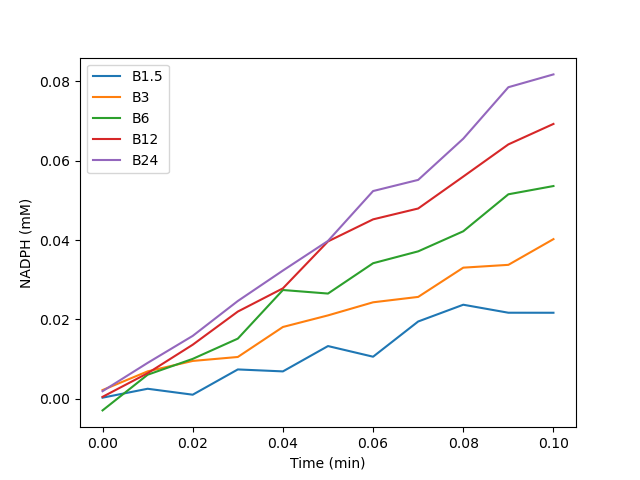

In [6]:
#plot 
f,ax = plt.subplots()
ax.plot (A8B1_5.Time, A8B1_5.NADPH, label='B1.5')
ax.plot (A8B3.Time, A8B3.NADPH, label='B3')
ax.plot (A8B6.Time, A8B6.NADPH, label='B6')
ax.plot (A8B12.Time, A8B12.NADPH, label='B12')
ax.plot (A8B24.Time, A8B24.NADPH, label='B24')
ax.set_xlabel('Time (min)')
ax.set_ylabel('NADPH (mM)')
ax.legend(loc='best')

In [7]:
#Question 2

In [8]:
A0B0 = pd.read_csv('A0B0.csv', sep=',',names=['Time', 'NADPH'])

In [9]:
regA0B0 = sp.stats.linregress(A0B0)
regA1B24 = sp.stats.linregress(A1B24)
regA2B24 = sp.stats.linregress(A2B24)
regA4B24 = sp.stats.linregress(A4B24)
regA8B24 = sp.stats.linregress(A8B24)
regA0_5B24 = sp.stats.linregress(A0_5B24)
regA8B1_5 = sp.stats.linregress(A8B1_5)
regA8B3 = sp.stats.linregress(A8B3)
regA8B6 = sp.stats.linregress(A8B6)
regA8B12 = sp.stats.linregress(A8B12)

In [10]:
#Question 3

In [11]:
regressions = [regA0B0,regA1B24,regA2B24,regA4B24,regA8B24,regA0_5B24,regA8B1_5,regA8B3,regA8B6,regA8B12]
rates = []
for reg in regressions:
    print (reg.slope)
    rates.append(reg.slope)
rates = np.array(rates)

0.004954646341627726
0.3526304449083254
0.5746500696105541
0.7322856639928835
0.8250788434733143
0.24118661159479945
0.25422083243133853
0.3679535702854621
0.556408829374724
0.7012039804663761


In [12]:
Concs_a = np.array([0.0,0.5,1,2,4,8,8,8,8,8])
Concs_b = np.array([0,24,24,24,24,24,1.5,3,6,12])
Comb_data = pd.DataFrame({'a':Concs_a,'b': Concs_b, 'rate': rates})

In [13]:
Comb_data

a     b      rate
0  0.0   0.0  0.004955
1  0.5  24.0  0.352630
2  1.0  24.0  0.574650
3  2.0  24.0  0.732286
4  4.0  24.0  0.825079
5  8.0  24.0  0.241187
6  8.0   1.5  0.254221
7  8.0   3.0  0.367954
8  8.0   6.0  0.556409
9  8.0  12.0  0.701204

In [14]:
#Question 4

In [15]:
def v(Vf, a, b, Ka, Kb):
  return (Vf*a*b)/((Ka+a)*(Kb+b))

In [16]:
from lmfit import Model
mymod = Model(v, independent_vars=['a','b'])
mypar = mymod.make_params(Ka=1,Kb=1,Vf=1)
myfit =mymod.fit(rates, mypar, a=Concs_a, b=Concs_b)

In [17]:
myfit

In [18]:
#Question 5

In [19]:
Comb_data ['a'] = 0 
Comb_data.head()

a     b      rate
0  0   0.0  0.004955
1  0  24.0  0.352630
2  0  24.0  0.574650
3  0  24.0  0.732286
4  0  24.0  0.825079

In [20]:
data_new = pd.concat